# Task 5 : Prodiy Infotech

**Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.**

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 100)

In [2]:
# reading the dataset and displaying first 5 rows

data = pd.read_csv("US_Accidents_March23.csv")
data.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [3]:
# Checking the dimension of the training dataset:

print("The total rows in the dataset is:" ,data.shape[0] ,"\nThe total columns in the dataset is:" ,data.shape[1])

The total rows in the dataset is: 7728394 
The total columns in the dataset is: 46


In [4]:
# Converting into date time format:

data['Start_Time'] = pd.to_datetime(data["Start_Time"], errors="coerce")
data['End_Time'] = pd.to_datetime(data["End_Time"], errors="coerce")
data["Year"]=data["Start_Time"].dt.year
data["Severity"]=data["Severity"].apply(lambda x : str(x))
data["Hour"]=data["Start_Time"].dt.hour
data["Month"]=data["Start_Time"].dt.month
data["Day"]=data["Start_Time"].dt.day_name()
data['Time_of_Year'] = data['Start_Time'].dt.quarter
data['Duration'] = data['End_Time'] - data['Start_Time']
data['Duration_in_minutes'] = data['Duration'].dt.total_seconds() / 60
data.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Hour,Month,Day,Time_of_Year,Duration,Duration_in_minutes
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2016.0,5.0,2.0,Monday,1.0,0 days 05:14:00,314.0
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day,2016.0,6.0,2.0,Monday,1.0,0 days 00:30:00,30.0
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day,2016.0,6.0,2.0,Monday,1.0,0 days 00:30:00,30.0
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,2016.0,7.0,2.0,Monday,1.0,0 days 00:30:00,30.0
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,2016.0,7.0,2.0,Monday,1.0,0 days 00:30:00,30.0


In [5]:
# Checking the type of data in each column:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 53 columns):
 #   Column                 Dtype          
---  ------                 -----          
 0   ID                     object         
 1   Source                 object         
 2   Severity               object         
 3   Start_Time             datetime64[ns] 
 4   End_Time               datetime64[ns] 
 5   Start_Lat              float64        
 6   Start_Lng              float64        
 7   End_Lat                float64        
 8   End_Lng                float64        
 9   Distance(mi)           float64        
 10  Description            object         
 11  Street                 object         
 12  City                   object         
 13  County                 object         
 14  State                  object         
 15  Zipcode                object         
 16  Country                object         
 17  Timezone               object         
 18  Ai

In [6]:
# Calculating the number of categorical and numeric column:

data.dtypes.value_counts()

object             20
float64            17
bool               13
datetime64[ns]      2
timedelta64[ns]     1
Name: count, dtype: int64

In [7]:
# checking for missing values

data.isna().sum().sort_values(ascending = False)

End_Lat                  3402762
End_Lng                  3402762
Precipitation(in)        2203586
Wind_Chill(F)            1999019
Duration_in_minutes       743166
Duration                  743166
Start_Time                743166
End_Time                  743166
Time_of_Year              743166
Day                       743166
Month                     743166
Hour                      743166
Year                      743166
Wind_Speed(mph)           571233
Visibility(mi)            177098
Wind_Direction            175206
Humidity(%)               174144
Weather_Condition         173459
Temperature(F)            163853
Pressure(in)              140679
Weather_Timestamp         120228
Nautical_Twilight          23246
Civil_Twilight             23246
Astronomical_Twilight      23246
Sunrise_Sunset             23246
Airport_Code               22635
Street                     10869
Timezone                    7808
Zipcode                     1915
City                         253
Descriptio

In [8]:
# Descriptive Analysis 

data.describe()

,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Year,Hour,Month,Time_of_Year,Duration,Duration_in_minutes
count,6985228,6985228,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06,6.985228e+06,6.985228e+06,6.985228e+06,6.985228e+06,6985228,6.985228e+06
mean,2020-03-21 21:49:59.056443136,2020-03-22 04:56:51.646936064,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03,2.019701e+03,1.226779e+01,6.747753e+00,2.577515e+00,0 days 07:06:52.590491248,4.268765e+02
min,2016-01-14 20:18:33,2016-02-08 06:37:08,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.016000e+03,0.000000e+00,1.000000e+00,1.000000e+00,0 days 00:01:13,1.216667e+00
25%,2018-09-17 02:20:31.750000128,2018-09-17 05:23:37.500000,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00,2.018000e+03,8.000000e+00,4.000000e+00,2.000000e+00,0 days 00:30:00,3.000000e+01
50%,2020-06-23 13:37:23.500000,2020-06-23 15:20:42,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00,2.020000e+03,1.300000e+01,7.000000e+00,3.000000e+00,0 days 01:02:43,6.271667e+01
75%,2021-10-28 15:44:07,2021-10-29 14:57:46.500000,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00,2.021000e+03,1.700000e+01,1.000000e+01,4.000000e+00,0 days 02:02:38,1.226333e+02
max,2023-03-31 23:30:00,2023-03-31 23:59:00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01,2.023000e+03,2.300000e+01,1.200000e+01,4.000000e+00,1953 days 10:19:00,2.812939e+06
std,NaN,NaN,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01,1.888793e+00,5.455518e+00,3.623057e+00,1.157143e+00,9 days 04:43:47.830129335,1.324380e+04


In [9]:
# The percentage share of missing values for each column in the entire data

missing_percentage = data.isna().sum().sort_values(ascending = False)/len(data)
missing_percentage

# sort out the ones with zeroes

missing_percentage[missing_percentage != 0]

End_Lat                  4.402935e-01
End_Lng                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Duration_in_minutes      9.616047e-02
Duration                 9.616047e-02
Start_Time               9.616047e-02
End_Time                 9.616047e-02
Time_of_Year             9.616047e-02
Day                      9.616047e-02
Month                    9.616047e-02
Hour                     9.616047e-02
Year                     9.616047e-02
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Nautical_Twilight        3.007869e-03
Civil_Twilight           3.007869e-03
Astronomical_Twilight    3.007869e-03
Sunrise_Sunset           3.007869e-03
Airport_Code             2.928810e-03
Street      

In [10]:
# Percentage of missing value

missing_values = data.isna().sum().sort_values(ascending=False)
missing_percentage = missing_values[missing_values!=0]/len(data)*100
print(" Percentage of Missing Values \n", missing_percentage)

 Percentage of Missing Values 
 End_Lat                  44.029355
End_Lng                  44.029355
Precipitation(in)        28.512858
Wind_Chill(F)            25.865904
Duration_in_minutes       9.616047
Duration                  9.616047
Start_Time                9.616047
End_Time                  9.616047
Time_of_Year              9.616047
Day                       9.616047
Month                     9.616047
Hour                      9.616047
Year                      9.616047
Wind_Speed(mph)           7.391355
Visibility(mi)            2.291524
Wind_Direction            2.267043
Humidity(%)               2.253301
Weather_Condition         2.244438
Temperature(F)            2.120143
Pressure(in)              1.820288
Weather_Timestamp         1.555666
Nautical_Twilight         0.300787
Civil_Twilight            0.300787
Astronomical_Twilight     0.300787
Sunrise_Sunset            0.300787
Airport_Code              0.292881
Street                    0.140637
Timezone               

In [11]:
data.drop(["End_Lat"],axis=1,inplace=True)
data.drop(["End_Lng"],axis=1,inplace=True)
data.drop(["Precipitation(in)"],axis=1,inplace=True) 
data.drop(["Wind_Chill(F)"],axis=1,inplace=True)
print(len(data.columns))

49


In [12]:
# List of Columns Having Null Values

null_cols = [i for i in data.columns if data[i].isnull().any()]
print(null_cols)

['Start_Time', 'End_Time', 'Description', 'Street', 'City', 'Zipcode', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Year', 'Hour', 'Month', 'Day', 'Time_of_Year', 'Duration', 'Duration_in_minutes']


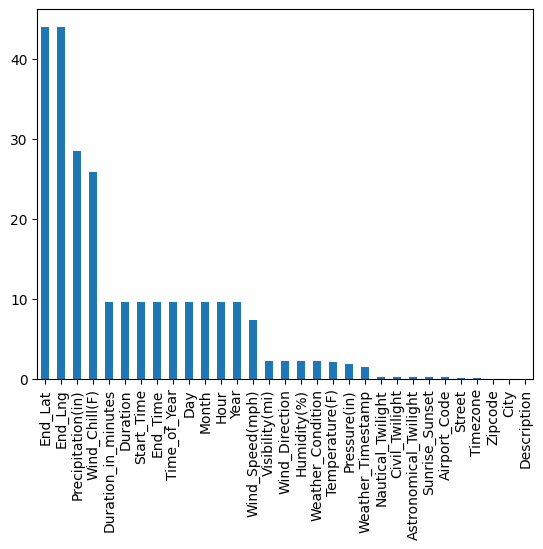

In [13]:
missing_percentage[missing_percentage != 0].plot(kind = "bar");
plt.show()

In [14]:
data.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Year',
       'Hour', 'Month', 'Day', 'Time_of_Year', 'Duration',
       'Duration_in_minutes'],
      dtype='object')

<Axes: xlabel='Severity', ylabel='count'>

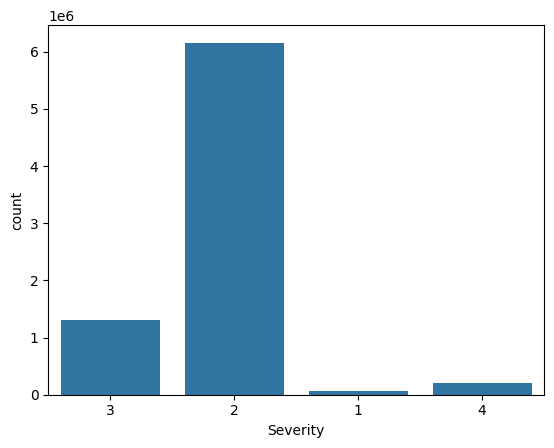

In [15]:
# Plotting the 'subscribed' frequency
sns.countplot(data=data, x='Severity')

In [16]:
crosstab=pd.crosstab(data["Timezone"],data["Severity"])
crosstab

Severity,1,2,3,4
Timezone,,,,
US/Central,12367,1265804,333429,34016
US/Eastern,31740,2834077,584709,129641
US/Mountain,10119,341518,63699,16483
US/Pacific,13060,1708730,316807,24387


In [17]:
cities = data.City.unique()
len(cities)

13679

In [18]:
# Showing no. of accidents in dfferent cities

cities_by_accidents = data.City.value_counts().sort_values(ascending = False)
cities_by_accidents

City
Miami                           186917
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Bon Secour                           1
Sidney Center                        1
Fluker                               1
Mapleville                           1
American Fork-Pleasant Grove         1
Name: count, Length: 13678, dtype: int64

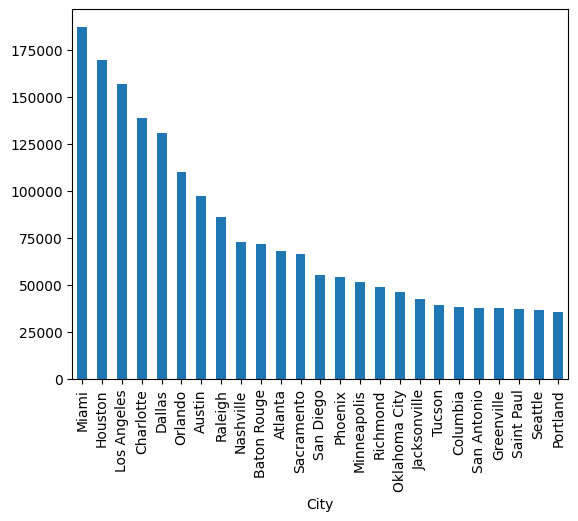

In [19]:
# Showing Top 25 cities with highest no. of accidents

cities_by_accidents[:25].plot(kind = 'bar');
plt.xticks(rotation=90)
plt.show()

In [20]:
high_accident_cities = cities_by_accidents[cities_by_accidents >=1000];
low_accident_cities = cities_by_accidents[cities_by_accidents < 1000];
print("No. of cities with high accidents are {}".format(len(high_accident_cities)))
print("Percentage of cities with high accidents are {}".format((len(high_accident_cities)/len(cities))*100))
print("No. of cities with low accidents are {}".format(len(low_accident_cities)))
print("Percentage of cities with low accidents are {}".format((len(low_accident_cities)/len(cities))*100))

No. of cities with high accidents are 1218
Percentage of cities with high accidents are 8.904159660793917
No. of cities with low accidents are 12460
Percentage of cities with low accidents are 91.0885298632941


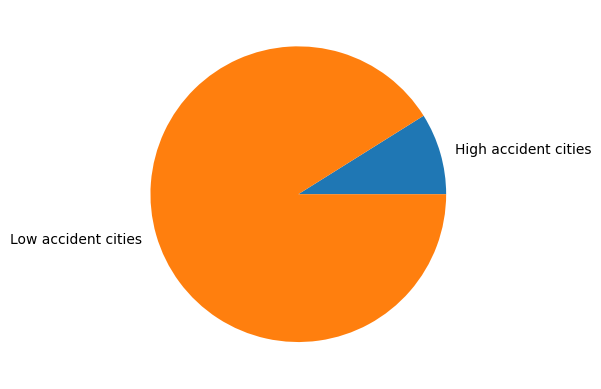

In [21]:
High_accident_zone = (len(high_accident_cities)/len(cities))*100
Low_accident_zone = (len(low_accident_cities)/len(cities))*100
y = np.array([High_accident_zone,Low_accident_zone])
mylabels = np.array(["High accident cities", "Low accident cities"])
plt.pie(y, labels = mylabels);
plt.show()

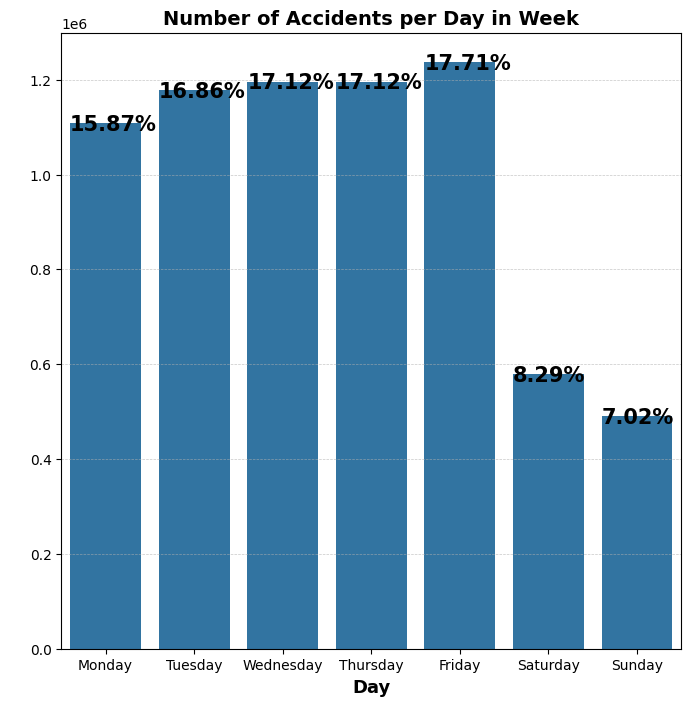

In [22]:
plt.figure(figsize=(8, 8))
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x=data["Day"], order=order)
# Calculate the total counts
total_counts = data["Day"].value_counts()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Day", fontsize=13, fontweight="bold")
plt.ylabel(" ")
plt.title("Number of Accidents per Day in Week", fontsize=14, fontweight="bold")
ax = plt.gca()
for i, bar in enumerate(ax.patches):
    proportion = (total_counts[order[i]]/total_counts.sum()) * 100
    ax.text(
        bar.get_x(),  
        bar.get_height()-15000,  
        f'{proportion:.2f}%',
        fontsize=15,
        weight='bold',
        color='black'
    )
plt.show()

In [23]:
data["Is_Weekend"] = data["Day"].isin(["Saturday", "Sunday"])

In [24]:
sns.reset_defaults()

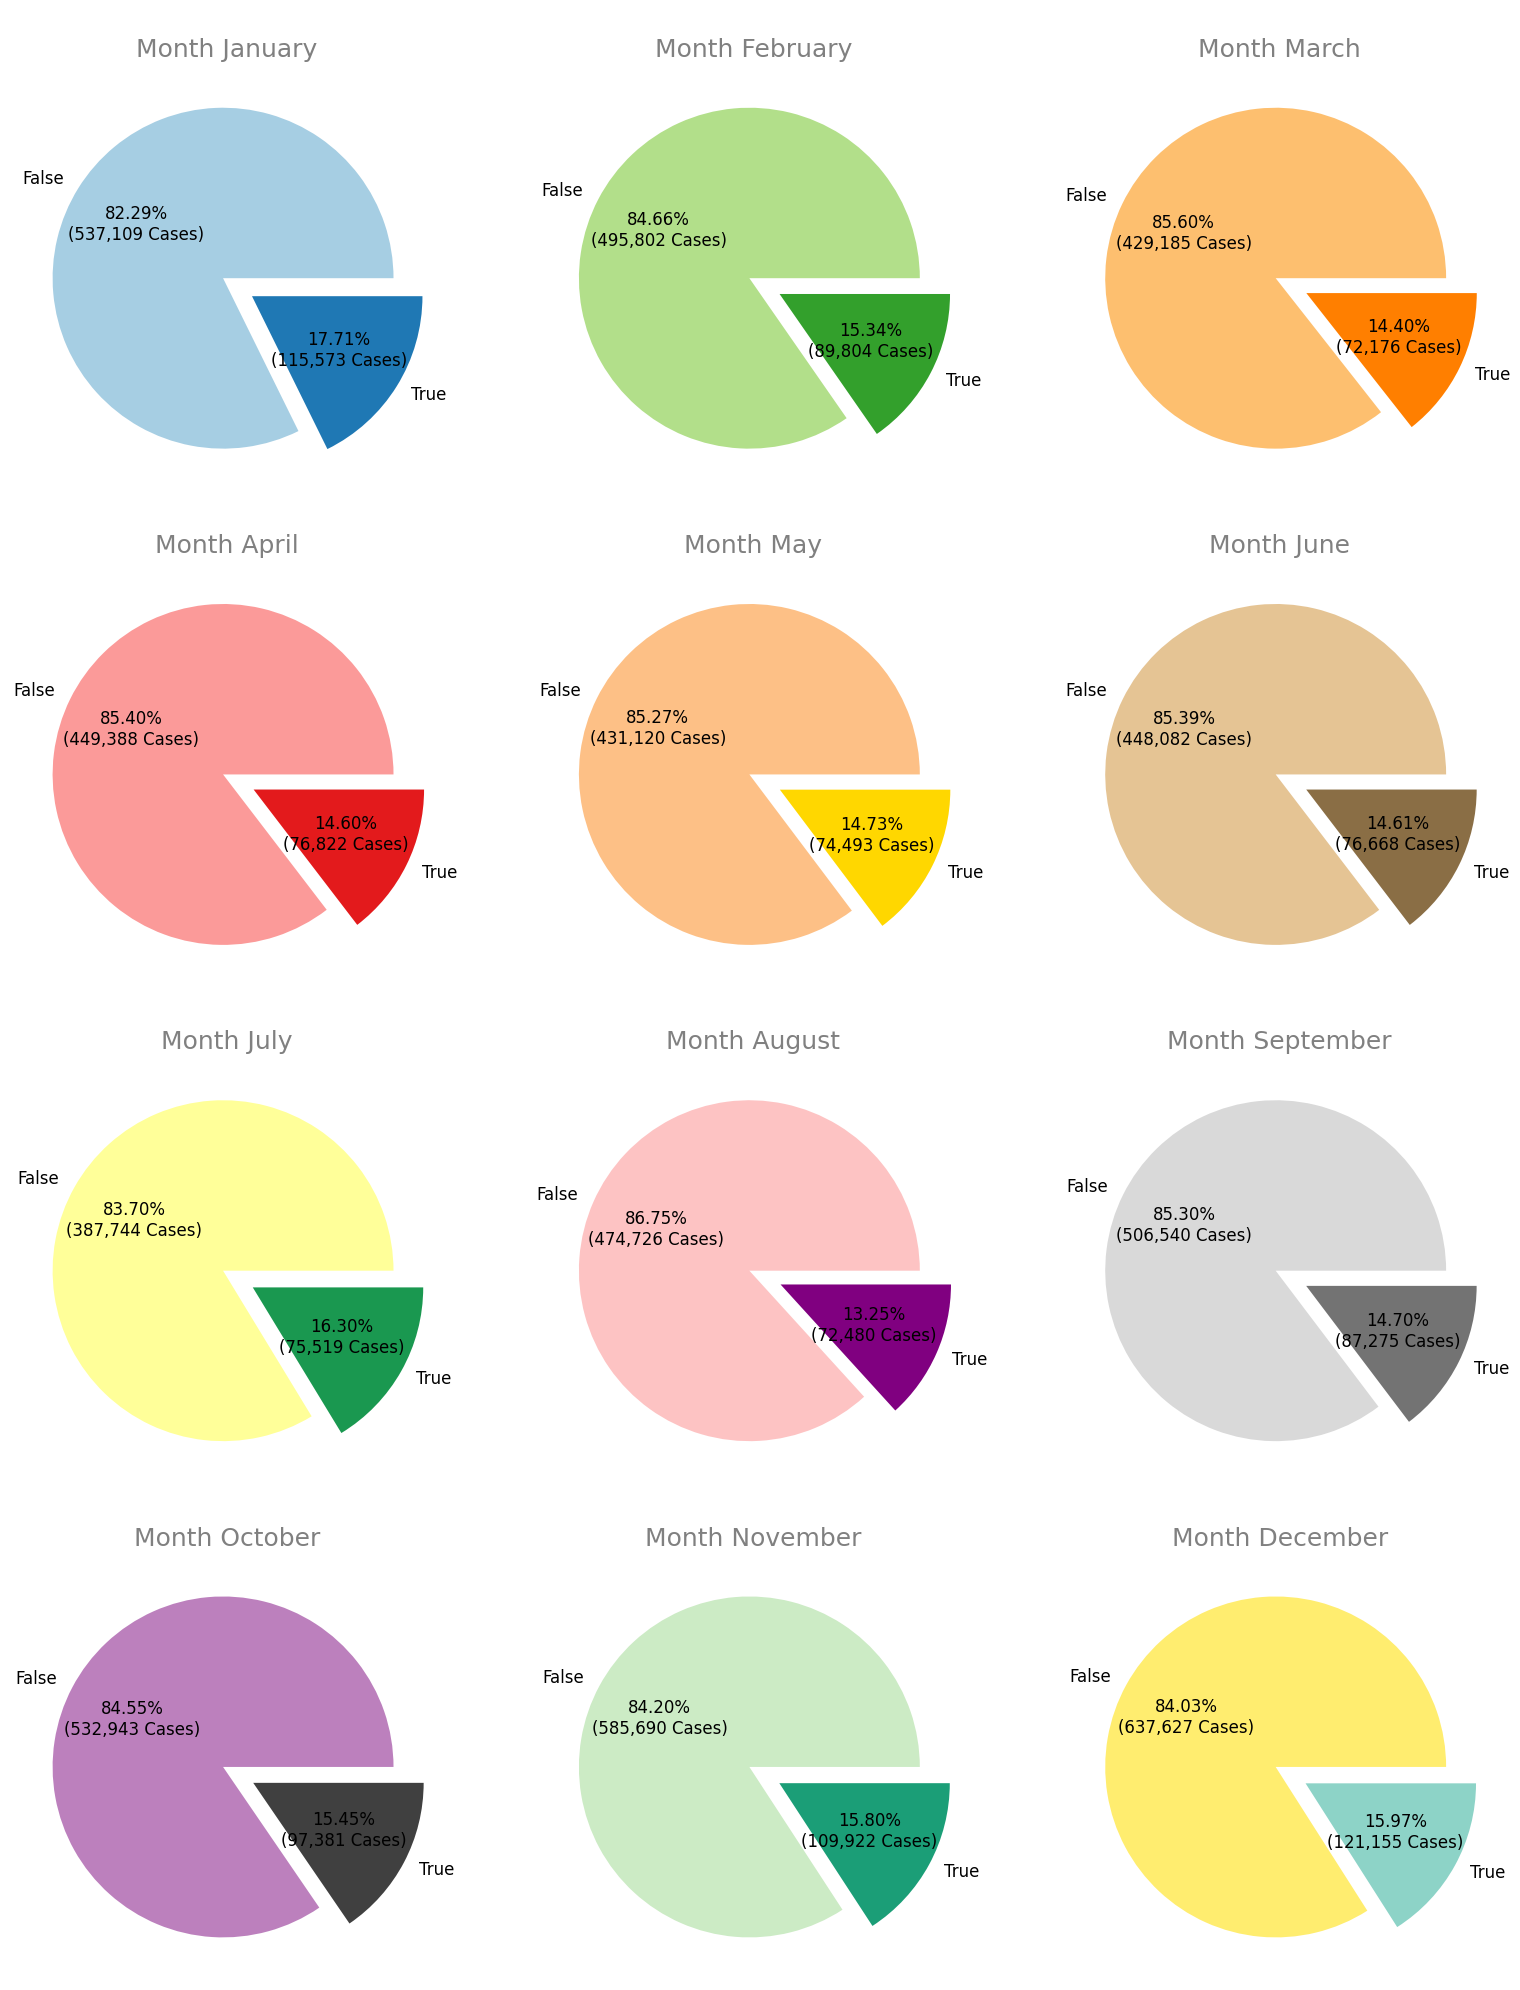

In [25]:
#displaying weekend vs non-weekend accidents
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 20))
month_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
colors = [('#A6CEE3', '#1F78B4'), ('#B2DF8A', '#33A02C'), ('#FDBF6F', '#FF7F00'), ('#FB9A99', '#E31A1C'),
          ('#FDC086', '#FFD700'), ('#E5C494', '#8A6E45'), ('#FFFF99', '#1A9850'), ('#FDC3C3', '#800080'),
          ('#D9D9D9', '#737373'), ('#BC80BD', '#404040'), ('#CCEBC5', '#1B9E77'), ('#FFED6F', '#8DD3C7')]
count = 0
def func(pct, allvals):
    absolute = int(round(pct / 100 * np.sum(allvals), 2))
    return "{:.2f}%\n({:,d} Cases)".format(pct, absolute)
for i, ax in enumerate(axes.flatten()):
    month = i + 1
    size = list(data[data["Month"] == month]["Is_Weekend"].value_counts())
    if len(size) != 2:
        size.append(0)
    labels = ['False', 'True']
    ax.pie(size, labels=labels, colors=colors[count],
           autopct=lambda pct: func(pct, size), labeldistance=1.1,
           textprops={'fontsize': 12}, explode=[0, 0.2])
    title = '\n Month {}'.format(month_map[month])
    ax.set_title(title, fontsize=18, color='grey')
    count += 1
plt.tight_layout()
plt.show()

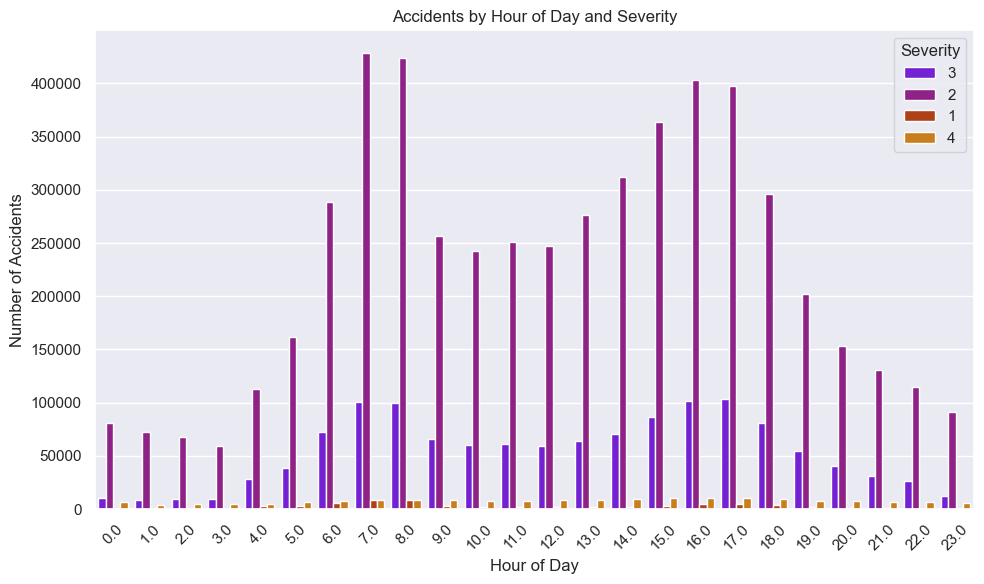

In [26]:
# Set chart style
palette=sns.color_palette('gnuplot')
sns.set(style="darkgrid", palette="gnuplot", context="notebook",)
# Extract hour of day from 'Start_Time'
data['Hour_of_Day'] = data['Start_Time'].dt.hour
# Create a new dataset with 'Severity' and 'Hour_of_Day' columns
severity_hour_dataset = data[['Severity', 'Hour_of_Day']].copy()
# Create a Seaborn countplot to visualize accidents by hour and severity
plt.figure(figsize=(10, 6))
sns.countplot(data=severity_hour_dataset, x='Hour_of_Day', hue='Severity', palette='gnuplot')
plt.title('Accidents by Hour of Day and Severity')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.legend(title='Severity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

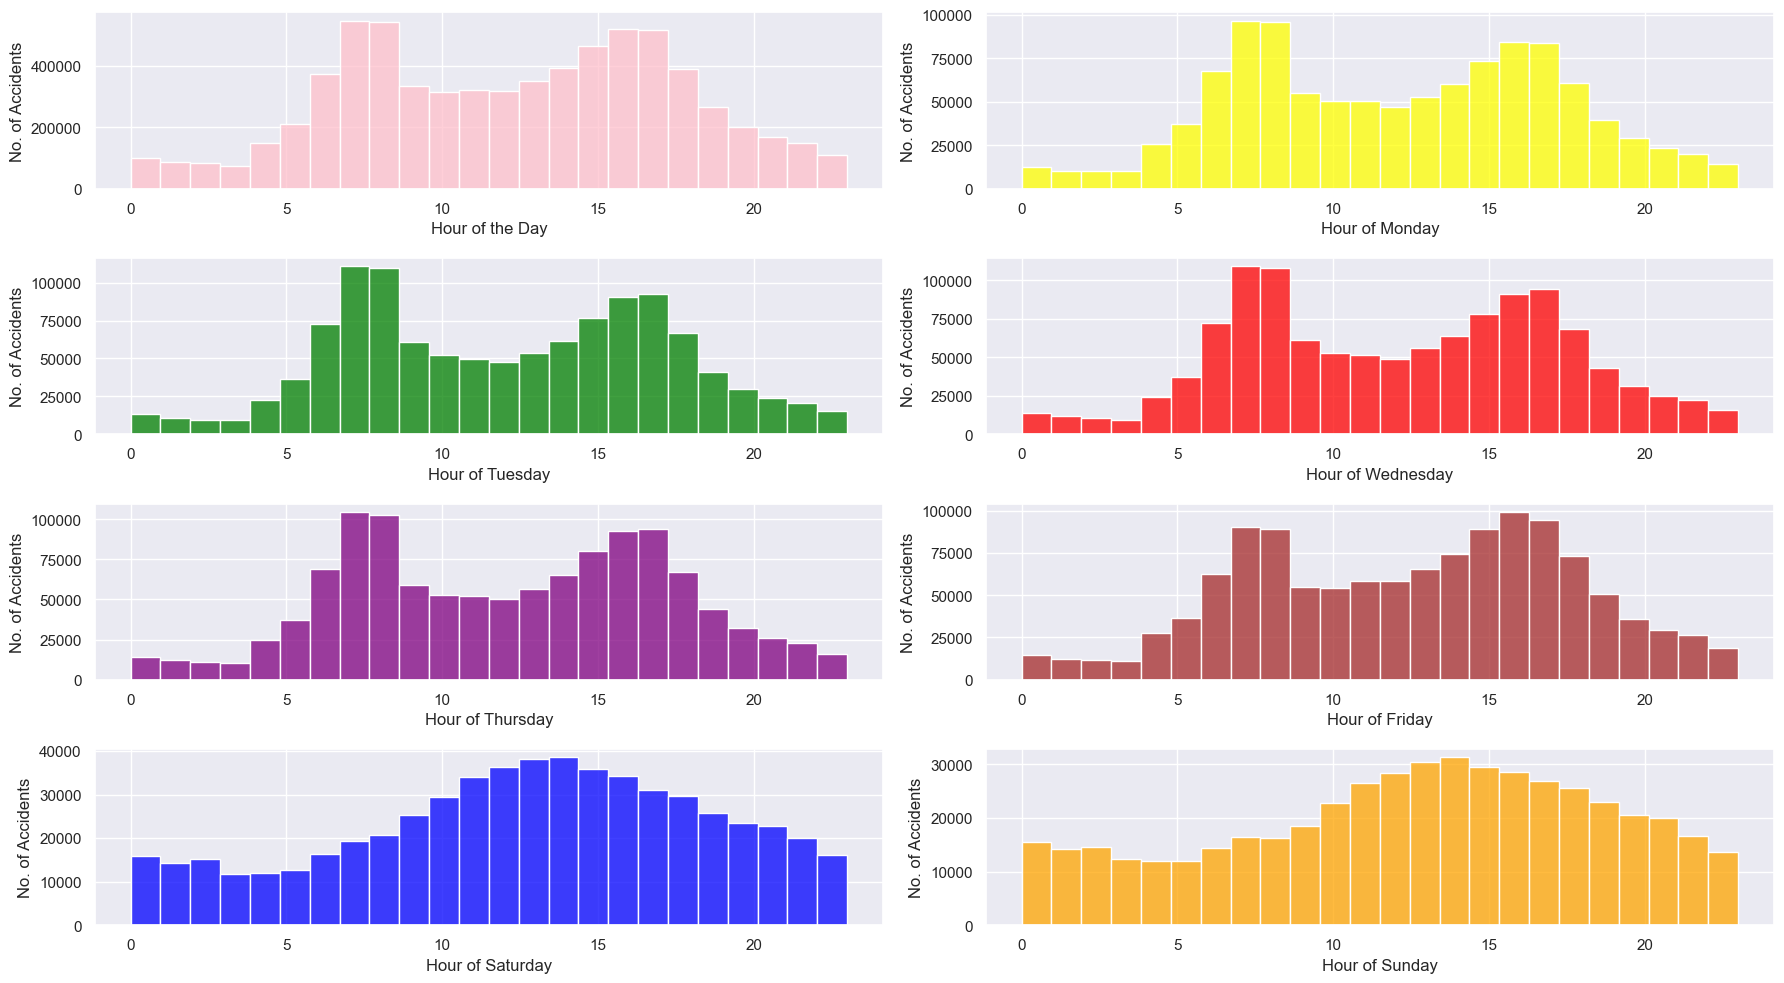

In [27]:
# Viewing the distribution of  hourly Accidents for each day of week separately.
fig,axes = plt.subplots(4, 2, figsize=(18, 10))
#For all days (Overall) Hourly accident distribution
sns.histplot(data.Start_Time.dt.hour, bins=24, ax=axes[0,0], color = "Pink");
axes[0,0].set_xlabel("Hour of the Day")
axes[0,0].set_ylabel("No. of Accidents")
#For Monday Hourly accident distribution
For_Monday = data.Start_Time[data.Start_Time.dt.dayofweek == 0]
Monday_distribution = sns.histplot(For_Monday.dt.hour, bins = 24, ax = axes[0,1], color = "Yellow")
axes[0,1].set_xlabel("Hour of Monday")
axes[0,1].set_ylabel("No. of Accidents")
#For Tuesday Hourly accident distribution
For_Tuesday = data.Start_Time[data.Start_Time.dt.dayofweek == 1]
Tuesday_distribution = sns.histplot(For_Tuesday.dt.hour, bins = 24, ax = axes[1,0],  color = "green")
axes[1,0].set_xlabel("Hour of Tuesday")
axes[1,0].set_ylabel("No. of Accidents")
#For Wednesday Hourly accident distribution
For_Wednesday = data.Start_Time[data.Start_Time.dt.dayofweek == 2]
Wednesday_distribution = sns.histplot(For_Wednesday.dt.hour, bins = 24, ax = axes[1,1],  color = "Red")
axes[1,1].set_xlabel("Hour of Wednesday")
axes[1,1].set_ylabel("No. of Accidents")
#For Thursday Hourly accident distribution
For_Thursday = data.Start_Time[data.Start_Time.dt.dayofweek == 3]
Thursday_distribution = sns.histplot(For_Thursday.dt.hour, bins = 24, ax = axes[2,0],  color = "Purple")
axes[2,0].set_xlabel("Hour of Thursday")
axes[2,0].set_ylabel("No. of Accidents")
#For Friday Hourly accident distribution
For_Friday = data.Start_Time[data.Start_Time.dt.dayofweek == 4]
Friday_distribution = sns.histplot(For_Friday.dt.hour, bins = 24, ax = axes[2,1],  color = "Brown")
axes[2,1].set_xlabel("Hour of Friday")
axes[2,1].set_ylabel("No. of Accidents")
#For Saturday Hourly accident distribution
For_saturday = data.Start_Time[data.Start_Time.dt.dayofweek == 5]
Saturday_distribution = sns.histplot(For_saturday.dt.hour, bins = 24, ax = axes[3,0],  color = "Blue")
axes[3,0].set_xlabel("Hour of Saturday")
axes[3,0].set_ylabel("No. of Accidents")
#For Sunday Hourly accident distribution
For_Sunday = data.Start_Time[data.Start_Time.dt.dayofweek == 6]
Sunday_distribution = sns.histplot(For_Sunday.dt.hour, bins = 24, ax = axes[3,1], color = "Orange")
axes[3,1].set_xlabel("Hour of Sunday")
axes[3,1].set_ylabel("No. of Accidents")
plt.tight_layout()
plt.show()

In [28]:
len(data["Weather_Condition"].unique())

145

In [29]:
data["Weather_Condition"].value_counts()

Weather_Condition
Fair                         2560802
Mostly Cloudy                1016195
Cloudy                        817082
Clear                         808743
Partly Cloudy                 698972
                              ...   
Heavy Sleet / Windy                1
Sand / Windy                       1
Heavy Rain Shower / Windy          1
Blowing Snow Nearby                1
Drifting Snow                      1
Name: count, Length: 144, dtype: int64

In [30]:
# Selecting only top 15 weather conditions which accounted for maximum accidents

weather = data['Weather_Condition'].value_counts().sort_values(ascending = False).head(15)     
weather

Weather_Condition
Fair                2560802
Mostly Cloudy       1016195
Cloudy               817082
Clear                808743
Partly Cloudy        698972
Overcast             382866
Light Rain           352957
Scattered Clouds     204829
Light Snow           128680
Fog                   99238
Rain                  84331
Haze                  76223
Fair / Windy          35671
Heavy Rain            32309
Light Drizzle         22684
Name: count, dtype: int64

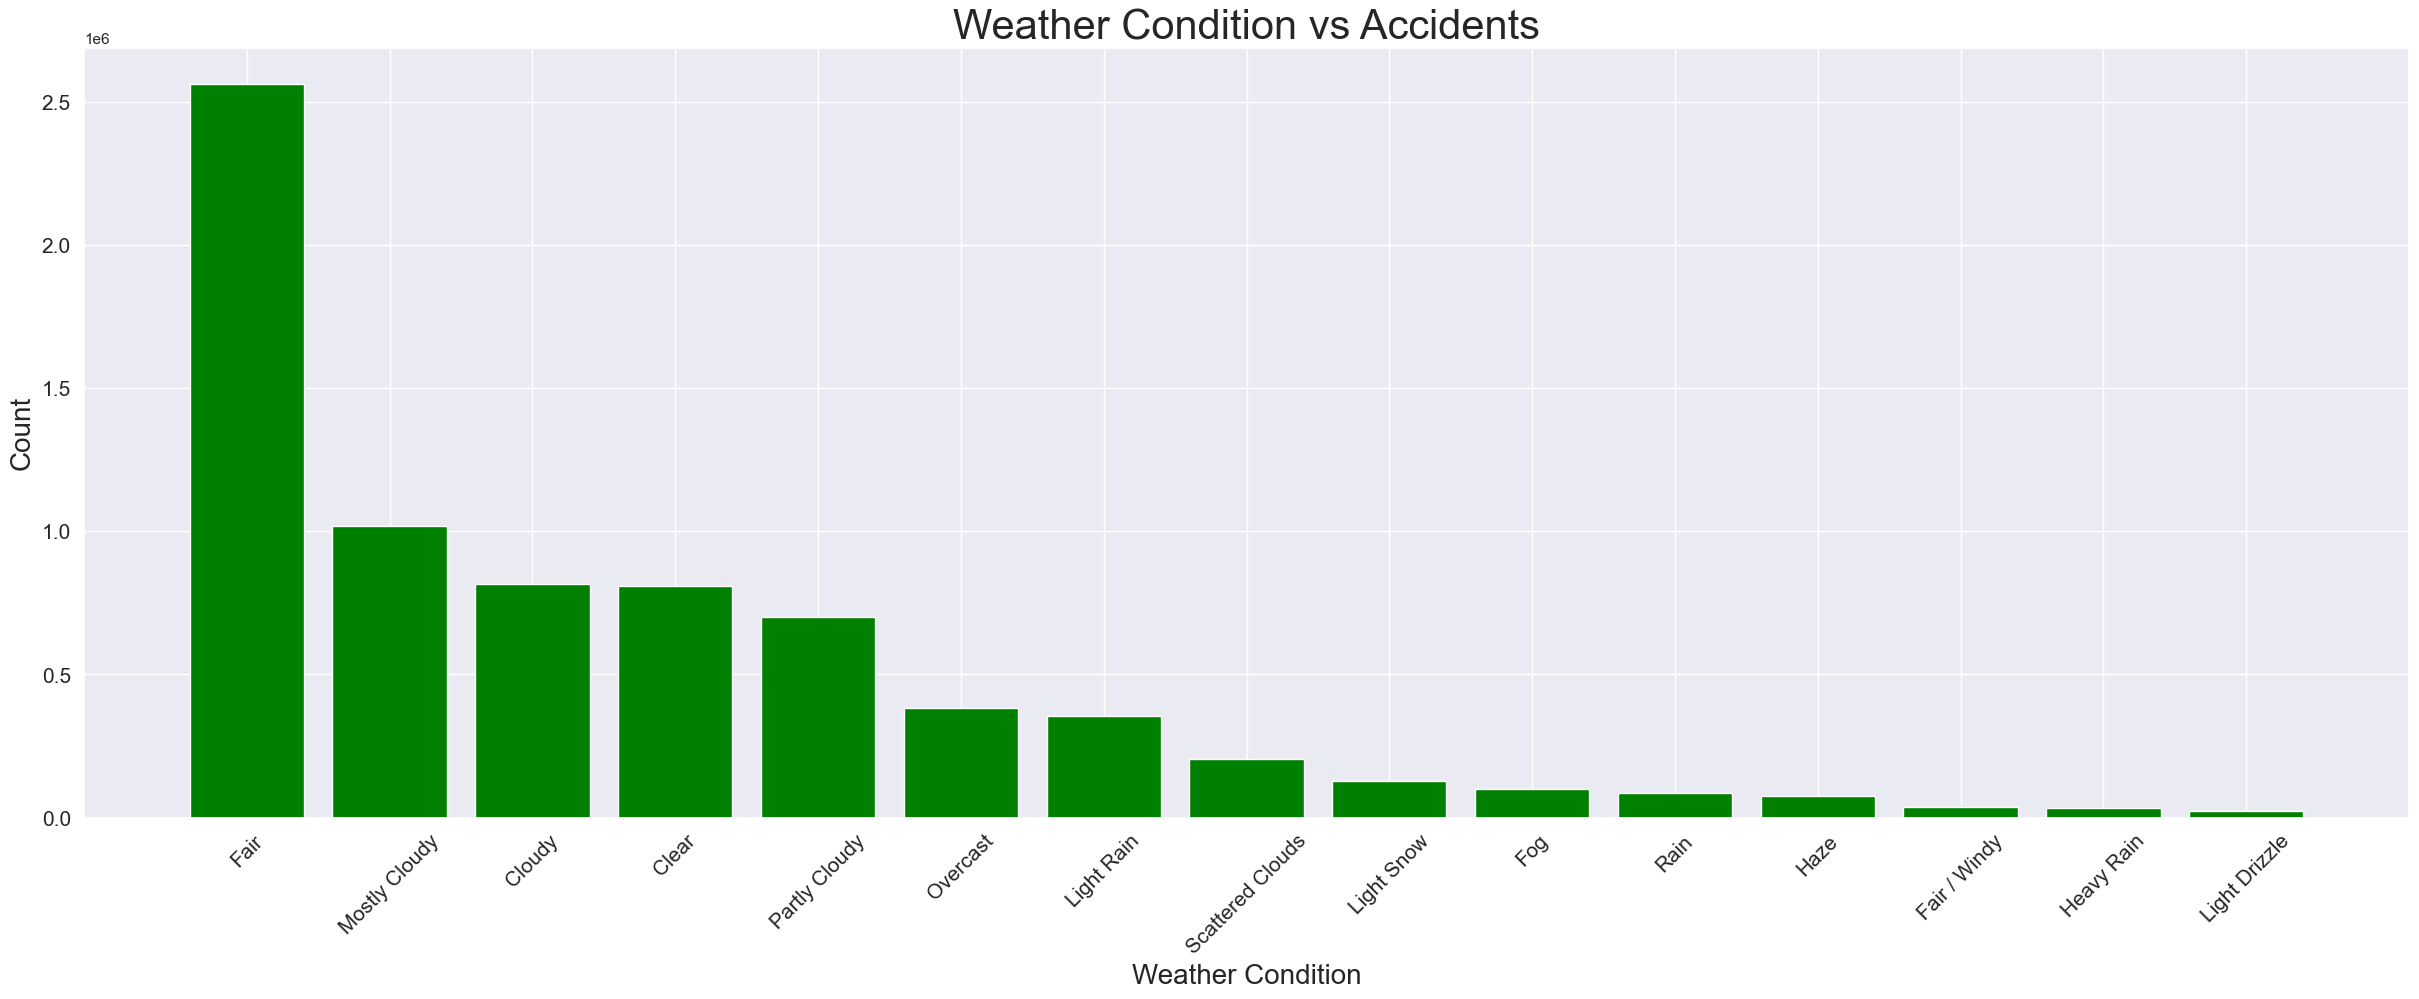

In [31]:
import random
figsize = (30, 10) 
Accident_Counts = weather.values
Weather_Conditions = weather.index
plt.figure(figsize=figsize)
plt.bar(Weather_Conditions, Accident_Counts,color='green')
plt.xticks(rotation=45, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Weather Condition", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Weather Condition vs Accidents", fontsize = 30)
plt.show()